In [7]:
import cv2
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from core.get_args import get_args
from core.produce_denoised_img import produce_denoised_img_no_crop

In [2]:
!ls /mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_tmp_dataset/Samsung+SNU+dataset+221115/[SET\ 5]/F1/1_F1.png

'/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_tmp_dataset/Samsung+SNU+dataset+221115/[SET 5]/F1/1_F1.png'


In [3]:
!ls

0-whole_process.ipynb			     medianfilter_img
0-whole_process_median.py		     median_img
0-whole_process.py			     output_log
5-CD_info_inspect			     process_img
CD_measure_single_input_F8-F16_and_F4-F8.sh  result_data
check_segmentation_F16_v1.ipynb		     RN2N_F8_segmentation.gif
core					     RN2N_F8_whole_segmentation.gif
denoised_img				     save_gif_of_whole_segmentation.py
hole_img				     segmentation_img
inspect_medianfilter_segmentation.ipynb      segmentation_inspect.ipynb
intermediate_code			     segmentation_output.txt
intermediate_result			     segmentation_whole.py
median_baseline_img			     test_speed_of_denoising
median_filter_baseline_F1~F32.py	     tmp_code
median_filter_baseline.ipynb		     Untitled.ipynb
median_filter_baseline.py		     wandb


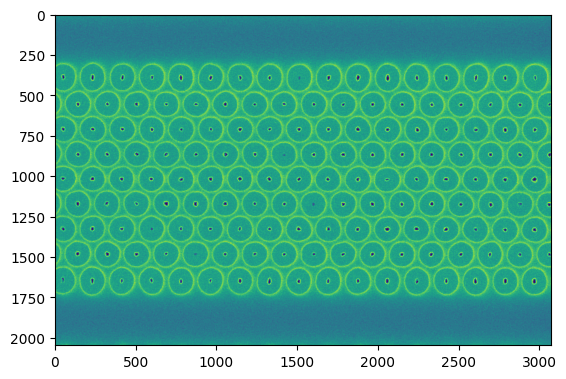

In [25]:
a = cv2.imread("/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_tmp_dataset/Samsung+SNU+dataset+221115/[SET 5]/F8/1_F8.png", cv2.IMREAD_GRAYSCALE)
b = cv2.imread("/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_tmp_dataset/Samsung+SNU+dataset+221115/[SET 5]/F64/1_F64.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(a)

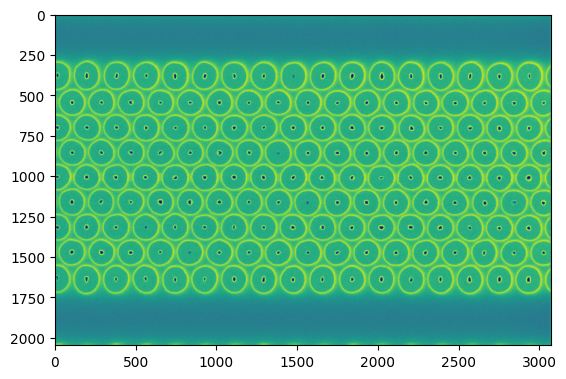

In [26]:
plt.imshow(b)

(2048, 3072)


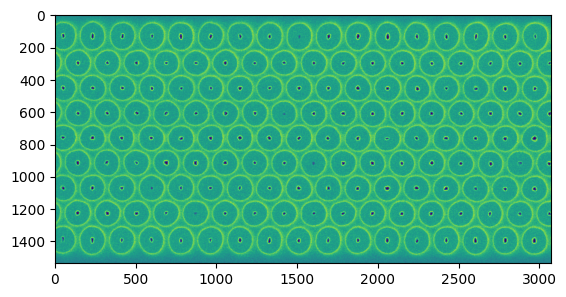

In [23]:

print(a.shape)

plt.imshow(a[256:-256])

In [18]:

df_describe = pd.DataFrame(a.flatten())
df_describe.describe()

,0
count,6.291456e+06
mean,1.451910e+02
std,3.866047e+01
min,0.000000e+00
25%,1.180000e+02
50%,1.450000e+02
75%,1.720000e+02
max,2.550000e+02


In [19]:
fbi_weight_dir = "../weights/230303_FBI_Net_Grayscale_Samsung_SET050607080910individual_x_as_F08_y_as_F16_MSE_Affine_layers_x17_filters_x64_cropsize_256.w"
## Denoising argument
args = get_args()
args.pge_weight_dir = None #pge_weight_dir
args.loss_function = "MSE_Affine"
args.noise_type = 'Poisson-Gaussian'
args.model_type = 'FBI_Net'
# args.set_num = '1'
args.data_name = 'Samsung'
args.data_type = 'Grayscale'
args.lr = 0.001
args.num_layers = 17
args.num_filters = 64
# args.crop_size = 200
args.debug = False

model = produce_denoised_img_no_crop(_pge_weight_dir=None,_fbi_weight_dir = fbi_weight_dir,_args = args)

In [20]:
in_img = np.expand_dims(a[256:-256],axis=0)
in_img = np.expand_dims(in_img, axis=0)/255
print(in_img.shape, in_img.dtype)
out = model.eval(in_img)

(1, 1, 1536, 3072) float64


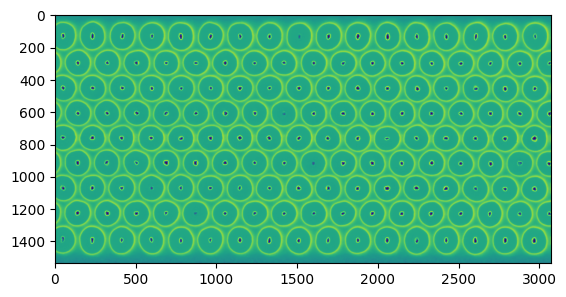

In [21]:
plt.imshow(out[0][0])